In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import copy
%matplotlib inline

In [5]:
class Particle():
    best_particle = None
    best_value = 0
    
    def __init__(self, min=-5, max=5, c1=1.0, c2=1.0, w=0.5):
        self.x = np.random.uniform(min, max)
        self.y = np.random.uniform(min, max)
        self.best_x = self.x
        self.best_y = self.y
        self.best_val = np.inf
        self.c1 = c1
        self.c2 = c2
        self.w = w
        self.v_x = np.random.uniform(min, max)
        self.v_y = np.random.uniform(min, max)
    
    def evaluate(self, goal):
        value = 0
        value += (goal[0] - self.x)**2
        value += (goal[1] - self.y)**2
        
        if value < self.best_val:
            self.best_val = value
            self.best_x = copy.deepcopy(self.x)
            self.best_y = copy.deepcopy(self.y)
            
        return value
        
    def update(self):
        r1, r2 = np.random.uniform(0, 1.0, 2)
        
        vx = self.w * self.v_x
        vx += self.c1*r1*(self.best_particle.best_x - self.x)
        vx += self.c2*r2*(self.best_x - self.x)
        vy = self.w * self.v_y
        vy += self.c1*r1*(self.best_particle.best_y - self.y)
        vy += self.c2*r2*(self.best_y - self.y)
        
        self.v_x = vx
        self.v_y = vy
        
        self.x += self.v_x
        self.y += self.v_y
        
    @classmethod
    def setBest(cls, best):
        cls.best_particle = copy.deepcopy(best)

In [6]:
fig = plt.figure(0)
def plotParticle(particles, goal):
    x = []
    y = []
    for i in particles:
        x.append(i.x)
        y.append(i.y)
    
    
    fig1, = plt.plot(x, y, "bx")
    fig2, = plt.plot(goal[0], goal[1], "rx")
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    return fig1

In [7]:
goal = (-3.5, 4.2)
n = 50

In [8]:
particles = np.array(np.zeros(n), dtype=object)
best_val = np.inf
for i,j in enumerate(particles):
    particles[i] = Particle()
    value = particles[i].evaluate(goal)
    if best_val > value:
        best_val = value
        p1 = particles[i]
Particle.setBest(p1)

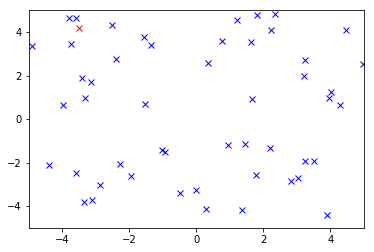

In [9]:
figs = []
#plotParticle(particles, goal)
figs.append([plotParticle(particles, goal)])

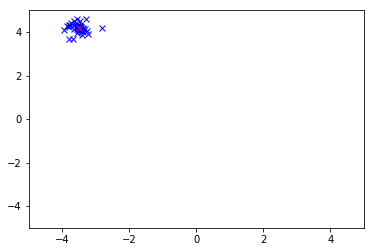

In [10]:
for k in range(10):
    for i, j in enumerate(particles):
        particles[i].update()
        value = particles[i].evaluate(goal)
        if best_val > value:
            best_val = value
            p1 = particles[i]
    Particle.setBest(p1)
    plt.clf()
    figs.append([plotParticle(particles, goal)])

In [8]:
ani = animation.ArtistAnimation(fig, figs)
plt.show()
#ani.save('sample.gif', writer='imagemagick')